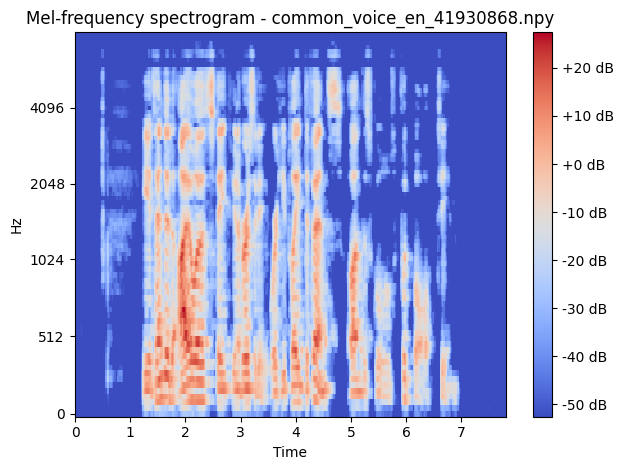

In [1]:
# Display one spectrogram
import numpy as np
import matplotlib.pyplot as plt
import torch
import librosa.display
import os

PROCESSED_DIR = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/data/processed/mini_cv"

npy_file = [file for file in os.listdir(PROCESSED_DIR) if file.endswith('.npy')][0]

spect_path = os.path.join(PROCESSED_DIR, npy_file)
S_dB = np.load(spect_path)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=22050, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title=f"Mel-frequency spectrogram - {npy_file}")
plt.tight_layout()
plt.show()

In [3]:
# Run a forward pass
import importlib.util
import sys
import torch
import os
from torch.utils.data import DataLoader

neural_file_path = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/"
datasets_file = os.path.join(neural_file_path, "datasets.py")
wrap_file = os.path.join(neural_file_path, "wrap_encoder.py")
cnn_file = os.path.join(neural_file_path, "cnn_encoder.py")

dataset_spec = importlib.util.spec_from_file_location("datasets", datasets_file)
datasets = importlib.util.module_from_spec(dataset_spec)
sys.modules["datasets"] = datasets
dataset_spec.loader.exec_module(datasets)
wrap_spec = importlib.util.spec_from_file_location("wrap_encoder", wrap_file)
wrap_encoder = importlib.util.module_from_spec(wrap_spec)
sys.modules["wrap_encoder"] = wrap_encoder
wrap_spec.loader.exec_module(wrap_encoder)
cnn_spec = importlib.util.spec_from_file_location("cnn_encoder", cnn_file)
cnn_encoder = importlib.util.module_from_spec(cnn_spec)
sys.modules["cnn_encoder"] = cnn_encoder
cnn_spec.loader.exec_module(cnn_encoder)

manifest_path = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/data/manifest.csv"
spect_dir = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/data/processed/mini_cv"
dataset = datasets.CEL_MiniCVDataset(manifest_path, spect_dir)
loader = DataLoader(dataset, batch_size=1, collate_fn=datasets.cel_collate_fn)

spect, target = next(iter(loader))
print(f"Spectogram shape: {spect.shape}")

model = wrap_encoder.WrapEncoder(cnn_encoder.CEL_CNNEncoder(), 10)
model.eval()

with torch.no_grad():
    output = model(spect)
print(f"Output shape: {output.shape}")

Spectogram shape: torch.Size([1, 1, 80, 359])
Output shape: torch.Size([1, 10])


In [5]:
# Shell-launch training
import subprocess
import os
proj_root = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr"
train_script = os.path.join(proj_root, "neural_networks/modeling/train.py")
env = os.environ.copy()
env["PYTHONPATH"] = proj_root

print("Running with PYTHONPATH:", env["PYTHONPATH"])

subprocess.run(["python", train_script, "--model_type", "cnn", "--epochs", "3", "--logdir", "runs/week3_cnn"], env=env, cwd=proj_root)

subprocess.run(["python", train_script, "--model_type", "rnn", "--epochs", "3", "--logdir", "runs/week3_rnn"], env=env, cwd=proj_root)


Running with PYTHONPATH: /Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr


2025-06-15 14:34:21.000 | INFO     | neural_networks.config:<module>:14 - PROJ_ROOT path is: /Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr


Train Epoch: 1 [0/60 (0%)]      Loss: 2.359717━━━━━━━━━━━━━━━━━━━   0% -:--:--
Epoch 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01

 Epoch 1 completed
Train loss: 3.0260
Val loss: 2.7544
Val accuracy: 0.0000
Train Epoch: 2 [0/60 (0%)]      Loss: 2.553802━━━━━━━━━━━━━━━━━━━   0% -:--:--
Epoch 2... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01

 Epoch 2 completed
Train loss: 2.5037
Val loss: 2.7201
Val accuracy: 0.1000
Train Epoch: 3 [0/60 (0%)]      Loss: 2.568865━━━━━━━━━━━━━━━━━━━   0% -:--:--
Epoch 3... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01

 Epoch 3 completed
Train loss: 2.4924
Val loss: 2.5408
Val accuracy: 0.0000


2025-06-15 14:34:28.861 | INFO     | neural_networks.config:<module>:14 - PROJ_ROOT path is: /Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr


Train Epoch: 1 [0/60 (0%)]      Loss: 2.267937━━━━━━━━━━━━━━━━━━━   0% -:--:--
Epoch 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01

 Epoch 1 completed
Train loss: 2.8739
Val loss: 3.2153
Val accuracy: 0.0500
Train Epoch: 2 [0/60 (0%)]      Loss: 2.831855━━━━━━━━━━━━━━━━━━━   0% -:--:--
Epoch 2... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01

 Epoch 2 completed
Train loss: 2.8644
Val loss: 2.7240
Val accuracy: 0.1000
Train Epoch: 3 [0/60 (0%)]      Loss: 2.865645━━━━━━━━━━━━━━━━━━━   0% -:--:--
Epoch 3... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01

 Epoch 3 completed
Train loss: 2.8709
Val loss: 2.7565
Val accuracy: 0.0500


CompletedProcess(args=['python', '/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/modeling/train.py', '--model_type', 'rnn', '--epochs', '3', '--logdir', 'runs/week3_rnn'], returncode=0)

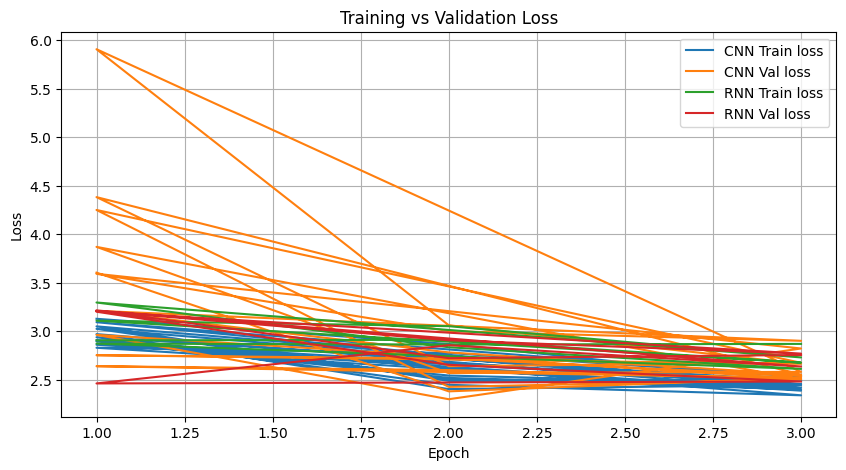

In [6]:
# Plot logged loss curves
import matplotlib.pyplot as plt
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def plot_loss_curves(log_dir, label_pref=""):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    train_losses = event_acc.Scalars("Loss/train")
    val_losses = event_acc.Scalars("Loss/val")

    train_steps = [x.step for x in train_losses]
    train_vals = [x.value for x in train_losses]
    val_steps = [x.step for x in val_losses]
    val_vals = [x.value for x in val_losses]

    plt.plot(train_steps, train_vals, label=f"{label_pref}Train loss")
    plt.plot(val_steps, val_vals, label=f"{label_pref}Val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(10,5))
plot_loss_curves("/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/runs/week3_cnn", "CNN ")
plot_loss_curves("/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/runs/week3_rnn", "RNN ")
plt.title("Training vs Validation Loss")
plt.show()